<a href="https://colab.research.google.com/github/Harish12121/Machine-Learning/blob/main/cnn_dataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator

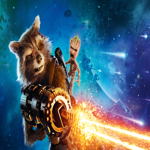

In [31]:
image_path = '/content/819478.jpg'
image = Image.open(image_path).convert('RGB')
image = image.resize((150, 150))
image

In [32]:
image_array = np.array(image)
image_array = image_array.reshape((1,) + image_array.shape)
image_array

array([[[[  4, 104, 120],
         [  4,  92, 102],
         [  3,  87,  91],
         ...,
         [ 16,  63,  91],
         [ 13,  58,  85],
         [  9,  50,  75]],

        [[  4, 106, 123],
         [  4,  92,  99],
         [  4,  87,  92],
         ...,
         [ 15,  63,  92],
         [ 11,  53,  80],
         [  9,  49,  73]],

        [[  4, 116, 121],
         [  4,  95,  98],
         [  4,  87,  92],
         ...,
         [ 14,  60,  89],
         [ 10,  50,  77],
         [ 10,  51,  77]],

        ...,

        [[  2,  26,  57],
         [  1,  32,  64],
         [  1,  31,  63],
         ...,
         [231, 127,  68],
         [238, 153,  82],
         [242, 168, 102]],

        [[  1,  27,  57],
         [  1,  34,  67],
         [  1,  32,  65],
         ...,
         [236, 159, 102],
         [239, 163, 106],
         [254, 220, 127]],

        [[  2,  26,  55],
         [  1,  30,  60],
         [  1,  28,  59],
         ...,
         [253, 213, 118],
        

In [33]:
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [34]:
augmented_images = data_augmentation.flow(image_array, batch_size=1)

In [35]:
save_directory = '/content/augmented_images/'
os.makedirs(save_directory, exist_ok=True)

In [36]:
for i, new_image_array in enumerate(augmented_images):
    if i >= 20:
        break
    new_image = Image.fromarray(np.uint8(new_image_array[0]))
    save_path = os.path.join(save_directory, f'augmented_image_{i}.jpg')
    new_image.save(save_path)